<a href="https://colab.research.google.com/github/TaeGongKim/tensorflow-developer/blob/main/Convolutional%20Neural%20Networks%20in%20TensorFlow/Multi_class_classifier_(sign_mnist_data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd

In [2]:
# sign_mnist_train.csv
!gdown --id 1z0DkA9BytlLxO1C0BAWzknLyQmZAp0HR
# sign_mnist_test.csv
!gdown --id 1z1BIj4qmri59GWBG4ivMNFtpZ4AXIbzg

Downloading...
From: https://drive.google.com/uc?id=1z0DkA9BytlLxO1C0BAWzknLyQmZAp0HR
To: /content/sign_mnist_train.csv
100% 83.3M/83.3M [00:01<00:00, 78.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1z1BIj4qmri59GWBG4ivMNFtpZ4AXIbzg
To: /content/sign_mnist_test.csv
100% 21.8M/21.8M [00:00<00:00, 69.3MB/s]


In [7]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    with open(filename) as training_file:
        csv_reader = csv.reader(training_file, delimiter = ',')
        first_line = True
        temp_images = []
        temp_labels = []
        
        for row in csv_reader:
            if first_line:
                first_line = False
            else:
                temp_labels.append(row[0])
                image_data = row[1:785]
                # np.array_split : data x를 n개만큼 array로 분할
                image_data_as_array = np.array_split(image_data, 28)
                temp_images.append(image_data_as_array)
                
        images = np.array(temp_images).astype('float')
        labels = np.array(temp_labels).astype('float')
    return images, labels

path_sign_mnist_train = f"./sign_mnist_train.csv"
path_sign_mnist_test = f"./sign_mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [8]:
training_images = np.expand_dims(training_images, axis = 3)
testing_images = np.expand_dims(testing_images, axis = 3)

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255)
    
# Keep These
print(training_images.shape)
print(testing_images.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [9]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.95):
            print("\nReached 95.0% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

In [10]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
                                    tf.keras.layers.MaxPooling2D((2, 2)),
                                    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D((2, 2)),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    tf.keras.layers.Dense(26, activation = 'softmax')])

# Compile Model. 
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

train_generator = train_datagen.flow(training_images, training_labels,
                                     batch_size = 64)

validation_generator = validation_datagen.flow(testing_images, testing_labels,
                                               batch_size = 64)

# Train the Model
history = model.fit_generator(train_generator,
                              epochs = 50,
                              validation_data = validation_generator,
                              callbacks = [callbacks])

model.evaluate(testing_images, testing_labels, verbose=0)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
429/429 [==============================] - 44s 32ms/step - loss: 2.7976 - accuracy: 0.1522 - val_loss: 2.0678 - val_accuracy: 0.2906
Epoch 2/50
429/429 [==============================] - 14s 32ms/step - loss: 2.0031 - accuracy: 0.3631 - val_loss: 1.1926 - val_accuracy: 0.5912
Epoch 3/50
429/429 [==============================] - 14s 31ms/step - loss: 1.5635 - accuracy: 0.4951 - val_loss: 0.9439 - val_accuracy: 0.6577
Epoch 4/50
429/429 [==============================] - 14s 32ms/step - loss: 1.2903 - accuracy: 0.5788 - val_loss: 0.8847 - val_accuracy: 0.6747
Epoch 5/50
429/429 [==============================] - 14s 32ms/step - loss: 1.1014 - accuracy: 0.6368 - val_loss: 0.6170 - val_accuracy: 0.7871
Epoch 6/50
429/429 [==============================] - 14s 32ms/step - loss: 0.9559 - accuracy: 0.6857 - val_loss: 0.5193 - val_accuracy: 0.8151
Epoch 7/50
429/429 [==============================] - 14s 32ms/step - loss: 0.8644 - accuracy: 0.7131 - val_loss: 0.4456 - val_accuracy:

[218.72828674316406, 0.6901840567588806]

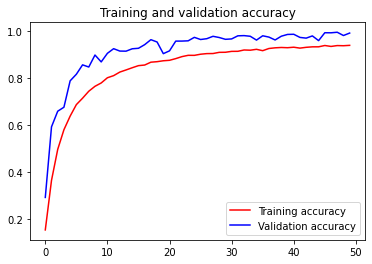

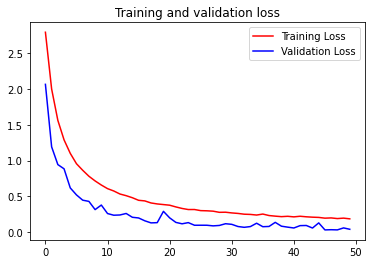

In [11]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()